In [3]:
import numpy as np
import pandas as pd
import csv
import urllib.request
import seaborn as sns
import random
import time


def CheckTime(func):
    def new_func(*args,**kwargs):
        start = time.time()
        func(*args,**kwargs)
        end = time.time()
        print("실행시간 : {}".format(end-start))
    return new_func
    
@CheckTime
def data_preprocess():
    try:
        # data 선언
        downloaded_data  = 'OnlineNewsPopularity.csv'

        instance = 39644
        origin_news = pd.read_csv(downloaded_data)
        global my_news
        global sns_my_news
        global craw_news
        global n_high_instance
        global n_low_instance
        global n_craw_high_instance
        global n_craw_low_instance
        
        my_news = origin_news

        my_news = my_news.sort_values(by=' shares')
        my_news[' sha_rank'] = my_news[' shares'].rank(ascending=0)

        for i in my_news.index:
            my_news.loc[i,' shares']/=10000

        sha_grade =[]

        for i in my_news[' shares']:
            if i <= 0.1: # 1000이하는 Low
                sha_grade.append("Low")
            elif i >=1.5: # 15000이상은 High
                sha_grade.append("High")
            else:
                sha_grade.append("Mid")
        my_news[' sha_grade'] = sha_grade # columns 추가
        
        my_news=my_news[my_news[' sha_grade']!="Mid"]
        for i in my_news.index:
            if my_news.loc[i,' sha_grade'] == "Low":
                if random.randint(1,11)!=5:
                    my_news=my_news.drop(i,0)


        craw_news = my_news
        for i in craw_news.index:
            if craw_news.loc[i,' sha_grade'] == "Low":
                if random.randint(0,2)!=1:
                    craw_news=craw_news.drop(i,axis=0)
            else:
                if random.randint(0,2)!=1:
                    craw_news =craw_news.drop(i,axis=0)

        
        n_high_instance = my_news[my_news[' sha_grade']=="High"].shape[0]
        n_low_instance = my_news[my_news[' sha_grade']=="Low"].shape[0]    
        n_craw_high_instance = craw_news[craw_news[' sha_grade']=="High"].shape[0]
        n_craw_low_instance = craw_news[craw_news[' sha_grade']=="Low"].shape[0]
        print(n_craw_high_instance)
        print(n_craw_low_instance)

        channel = []

        for i in my_news.index:
            if int(my_news.loc[i,' data_channel_is_lifestyle']) == 1:
                channel.append("1") #life
                continue
            elif int(my_news.loc[i,' data_channel_is_entertainment']) == 1:
                channel.append("2") #enter
                continue
            elif int(my_news.loc[i,' data_channel_is_bus']) == 1:
                channel.append("3") #bus
                continue
            elif int(my_news.loc[i,' data_channel_is_socmed']) == 1:
                channel.append("4") #socmed
                continue
            elif int(my_news.loc[i,' data_channel_is_tech']) == 1:
                channel.append("5") #tech
                continue
            elif int(my_news.loc[i,' data_channel_is_world']) == 1:
                channel.append("6") #world
                continue
            else:
                channel.append("7") #etc
                continue
        my_news[' channel'] = channel

        day = []

        for i in my_news.index:
            if int(my_news.loc[i,' weekday_is_monday']) == 1:
                day.append("1") #monday
                continue
            elif int(my_news.loc[i,' weekday_is_tuesday']) == 1:
                day.append("2") #tuesday
                continue
            elif int(my_news.loc[i,' weekday_is_wednesday']) == 1:
                day.append("3") #wednesday
                continue
            elif int(my_news.loc[i,' weekday_is_thursday']) == 1:
                day.append("4") #thursday
                continue
            elif int(my_news.loc[i,' weekday_is_friday']) == 1:
                day.append("5") #friday
                continue
            elif int(my_news.loc[i,' weekday_is_saturday']) == 1:
                day.append("6") #saturday
                continue
            elif int(my_news.loc[i,' weekday_is_sunday']) == 1:
                day.append("7")  #sunday
                continue
        my_news[' day'] = day

        sns_my_news = my_news
    except:
        print("preprocessing error!")
    
if __name__ == "__main__":
    data_preprocess()


414
372
실행시간 : 59.40037703514099


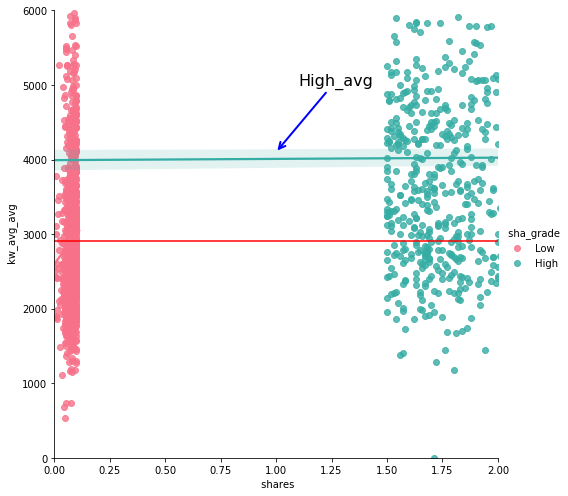

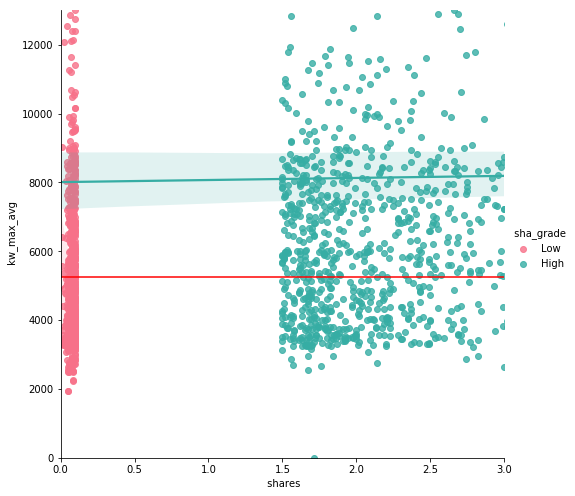

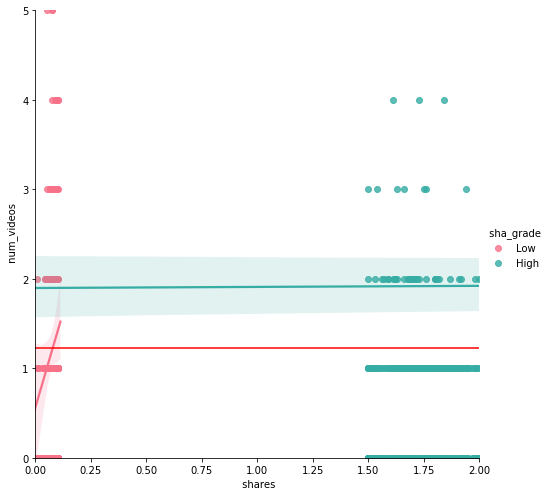

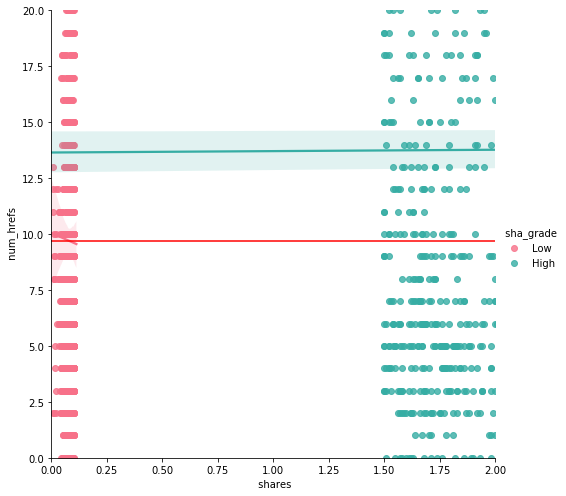

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

try:
    sns.pairplot(sns_my_news, hue=' sha_grade',
                 y_vars=[' kw_avg_avg'],
                 x_vars=[' shares'],
                 palette="husl",
                 height =7,
                 aspect =1,
                 kind="reg")

    plt.xlim(0,2)
    plt.ylim(0,6000)
    
    low_sum=0.0
    high_sum=0.0
    for i in sns_my_news.index:
        if sns_my_news.loc[i,' sha_grade']=="High":
            high_sum+=sns_my_news.loc[i,' kw_avg_avg']
        else:
            low_sum+=sns_my_news.loc[i,' kw_avg_avg']
    x = [0,2]
    y = []
    y.append(low_sum/n_low_instance)
    y.append(low_sum/n_low_instance)
    plt.annotate(r'High_avg',xy=(1,4100),xycoords='data',xytext=(1.1,5000),
                fontsize=16,arrowprops=dict(arrowstyle="->",linewidth=2,color="b"))
        plt.annotate(r'High_avg',xy=(1,4100),xycoords='data',xytext=(0.9,5000),
                fontsize=16,arrowprops=dict(arrowstyle="->",linewidth=2,color="b"))
    plt.plot(x,y,color="red")


    sns.pairplot(sns_my_news, hue=' sha_grade',
                 y_vars=[' kw_max_avg'],
                 x_vars=[' shares'],
                 height =7,
                 aspect =1,
                 palette="husl",
                 kind="reg")
    plt.xlim(0,3)
    plt.ylim(0,13000)
    low_sum=0.0
    high_sum=0.0
    for i in sns_my_news.index:
        if sns_my_news.loc[i,' sha_grade']=="High":
            high_sum+=sns_my_news.loc[i,' kw_max_avg']
        else:
            low_sum+=sns_my_news.loc[i,' kw_max_avg']
    x = [0,3]
    y = []
    y.append(low_sum/n_low_instance)
    y.append(low_sum/n_low_instance)
    plt.plot(x,y,color="red")


    sns.pairplot(sns_my_news, hue=' sha_grade', 
                 y_vars=[' num_videos'],
                 x_vars=[' shares'],
                 height =7,
                 aspect =1,
                 palette="husl",
                 kind ="reg"
                 )
    plt.xlim(0,2)
    plt.ylim(0,5)
    low_sum=0.0
    high_sum=0.0
    for i in sns_my_news.index:
        if sns_my_news.loc[i,' sha_grade']=="High":
            high_sum+=sns_my_news.loc[i,' num_videos']
        else:
            low_sum+=sns_my_news.loc[i,' num_videos']
    x = [0,2]
    y = []
    y.append(low_sum/n_low_instance)
    y.append(low_sum/n_low_instance)
    plt.plot(x,y,color="red")

    sns.pairplot(sns_my_news, hue=' sha_grade', 
                 y_vars=[' num_hrefs'],
                 x_vars=[' shares'],
                 height =7,
                 aspect =1,
                 palette="husl",
                 kind ="reg"
                 )
    plt.xlim(0,2)
    plt.ylim(0,20)
    low_sum=0.0
    high_sum=0.0
    for i in sns_my_news.index:
        if sns_my_news.loc[i,' sha_grade']=="High":
            high_sum+=sns_my_news.loc[i,' num_hrefs']
        else:
            low_sum+=sns_my_news.loc[i,' num_hrefs']
    x = [0,2]
    y = []
    y.append(low_sum/n_low_instance)
    y.append(low_sum/n_low_instance)

    plt.plot(x,y,color="red")
    
except:
    print("visualization error!")
    print("please check the preprocessing process")



Out-of-bag score estimate: 0.745
Mean accuracy score: 0.764
deep learning error!
please check the preprocessing process


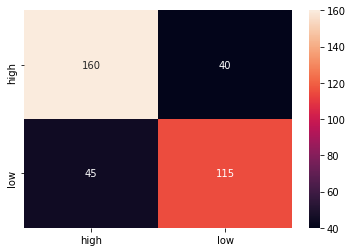

In [6]:
try:
    temp = my_news
    y = temp[' sha_grade']
    temp = temp.drop( [' n_unique_tokens',' n_non_stop_unique_tokens',' n_non_stop_words'
                       ,' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',
                ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' is_weekend'
                 ,' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',
                 'url',' sha_grade', ' shares',' sha_rank'] ,axis=1)
    X = temp
    #print(X.head())

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100,oob_score=True, random_state =123456,n_jobs=1)
    rf.fit(X_train,y_train)

    from sklearn.metrics import accuracy_score

    predicted = rf.predict(X_test)
    accuracy = accuracy_score(y_test,predicted)
    print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
    print(f'Mean accuracy score: {accuracy:.3}')

    from sklearn.metrics import confusion_matrix
    #print(y_test,predicted)

    cm = pd.DataFrame(data = confusion_matrix(y_test,predicted),columns=['high','low'],index=['high','low'])
    #print(cm)
    sns.heatmap(cm,annot=True,fmt="d")

    #print("특성 중요도 : \n{}".format(rf.feature_importances_))

    #print(sum)

    def plot_feature_importances_cancer(model):
        n_features = temp.shape[1]
        plt.figure(figsize=(5,10))
        plt.barh(range(n_features), model.feature_importances_, align='center')
        plt.yticks(np.arange(n_features),temp.columns)
        plt.xlabel("attribute importances")
        plt.ylabel("attrributes")
        plt.ylim(-1, n_features)
    plt.show()

    plot_feature_importances_cancer(rf)
except:
    print("deep learning error!")
    print("please check the preprocessing process")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


      High  Low
High   147   52
Low     63   98
              precision    recall  f1-score   support

        High       0.70      0.74      0.72       199
         Low       0.65      0.61      0.63       161

    accuracy                           0.68       360
   macro avg       0.68      0.67      0.67       360
weighted avg       0.68      0.68      0.68       360



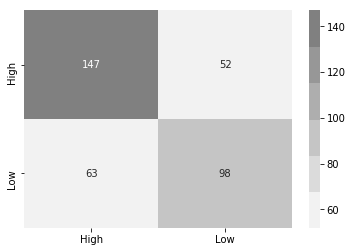

In [8]:
try:
    temp = my_news
    y = temp[' sha_grade']
    temp = temp.drop( [' n_unique_tokens',' n_non_stop_unique_tokens',' n_non_stop_words',
                       ' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04',
                       ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' is_weekend' ,
                       ' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',
                       'url',' sha_grade', ' shares',' sha_rank'] ,axis=1)
    X = temp
    #print(X.head())
    from sklearn.model_selection import train_test_split 
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
    from sklearn.preprocessing import StandardScaler 
    scaler = StandardScaler()
    scaler.fit(X_train)
    StandardScaler(copy=True, with_mean=True, with_std=True) 
    X_train = scaler.transform(X_train) 
    X_test = scaler.transform(X_test)

    from sklearn.neural_network import MLPClassifier 
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30)) 
    mlp.fit(X_train,y_train)

    from sklearn.metrics import classification_report,confusion_matrix 
    predictions = mlp.predict(X_test)

    hm = pd.DataFrame(data=confusion_matrix(y_test, predictions), columns=['High','Low'], index=['High','Low'])
    print(hm) 
    sns.heatmap(hm, annot=True,fmt="d",cmap=sns.light_palette("grey")) 
    print(classification_report(y_test,predictions))
except:
    print("randomforesst(ML) error!")
    print("please check the preprocessing process")

In [70]:
import requests
from bs4 import BeautifulSoup
import re
import time
try:
    start = time.time()
    low_dic={}
    high_dic={}

    title_p = re.compile(r'(?=<title>)(.*)(?<=</title>)',re.M)
    word_p = re.compile(r'\b[a-zA-Z]{3,15}\b',re.M)

    for i in craw_news.index:
        if craw_news.loc[i,' sha_grade']=="Low": # Low
            res = requests.get(my_news.loc[i,'url'])
            soup = BeautifulSoup(res.content,'html.parser')
            m = title_p.search(str(soup))
            m = re.sub(r"title|[/]title","",m.group(0))

            words = word_p.findall(m)

            for word in words:
                word = word.lower()
                if (word =="the" or word =="for" or 
                    word =="and" or word =="with" or
                    word == "from" or word =="that"or
                    word == "this"):
                    continue;
                if word in low_dic:
                    low_dic[word] += 1
                else:
                    low_dic[word] = 1

        else: #High
            res = requests.get(my_news.loc[i,'url'])
            soup = BeautifulSoup(res.content,'html.parser')
            m = title_p.search(str(soup))
            m = re.sub(r"title|[/]title","",m.group(0))
            words = word_p.findall(m)

            for word in words:
                word=word.lower()
                if (word =="the" or word =="for" or 
                    word =="and" or word =="with" or
                    word == "from" or word =="that"or
                    word == "this"):
                    continue;
                if word in high_dic:
                    high_dic[word] += 1
                else:
                    high_dic[word] = 1


    low_lst = sorted(low_dic.items(), key=lambda kv: kv[1], reverse=True)
    print("Low shares")
    for w,c in low_lst[:20]:
        print(w, c)
    print()
    print("High shares")
    high_lst = sorted(high_dic.items(), key=lambda kv: kv[1], reverse=True)
    for w,c in high_lst[:20]:
        print(w, c)
    
    end = time.time()
    print("실행시간 {0:.2f}sec".format(end-start))
    
except:
    print("crawling error!")
    print("please check the preprocessing process")

Low shares
video 35
you 27
your 24
will 18
twitter 16
new 16
apple 15
more 15
are 13
google 13
now 11
how 11
best 10
facebook 9
live 9
game 9
time 8
its 8
what 8
star 8

High shares
you 53
video 45
your 41
new 20
facebook 18
how 16
twitter 16
will 14
are 12
google 12
like 12
iphone 12
time 11
app 11
what 11
know 11
out 10
game 10
about 10
first 10
실행시간 932.04sec


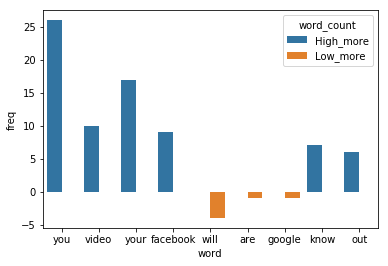

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
high_lst = high_lst[:20]
low_lst = low_lst[:20]

words=[]
freq=[]
for word in high_lst:
    if word[0] in low_dic:
        if word[1]-low_dic[word[0]] > 5 or word[1] - low_dic[word[0]]<0:
            freq.append(word[1]-low_dic[word[0]])
            words.append(word[0])
            

df_data =list(zip(words,freq))
df = pd.DataFrame(data=df_data,columns=['word','freq'])
g=[]
for i in df['freq']:
    if i>0:
        g.append('High_more')
    else:
        g.append('Low_more')
df['word_count'] = g
#plt.bar(p_words,pos_freq,width=0.2,color='turquoise',label="high more")
#plt.bar(n_words,neg_freq,width=0.2,color='pink',label="low more")
#plt.legend(loc=0)
#plt.ylabel('low more                                                  high more')
sns.barplot(data=df,y='freq',x='word',hue='word_count')


